# Visualizations

C:\Users\ASHU\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


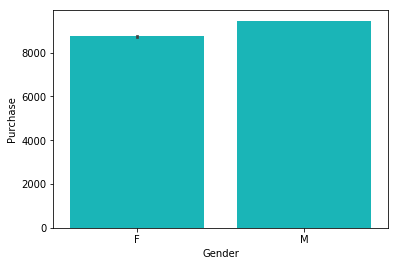

C:\Users\ASHU\Anaconda3\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\Users\ASHU\Anaconda3\lib\site-packages\seaborn\categorical.py:3672: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


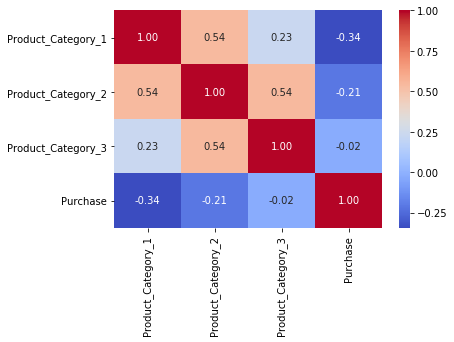

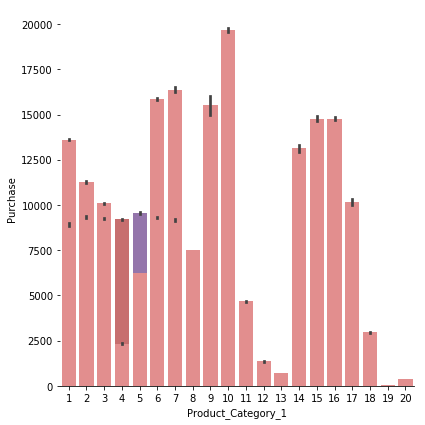

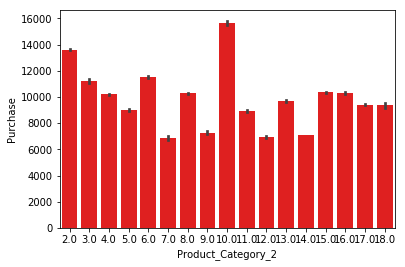

In [19]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

data=pd.read_csv('blktrain.csv')

numeric_data=['Age','Stay_In_Current_City_Years','Product_Category_1','Product_Category_2','Product_Category_3','Purchase']
categorical_data=['Gender','City_Category','Marital_Status','Occupation']

# Plots

sns.barplot('Gender', 'Purchase', data=data, color="darkturquoise")
plt.show()

sns.heatmap(data[numeric_data].corr(),annot=True,fmt='0.2f',cmap='coolwarm')

g=sns.factorplot(x='Age',y='Purchase',data=data,kind='bar',size=6,palette='muted')
g.despine(left=True)
g=g.set_ylabels('Purchase')
g=g.set_xlabels('Age')

sns.barplot('Product_Category_1', 'Purchase', data=data, color="lightcoral")
plt.show()

sns.barplot('Product_Category_2', 'Purchase', data=data, color="red")
plt.show()

# for train data

In [3]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error 

data=pd.read_csv('blktrain.csv')

numeric_data=['Age','Stay_In_Current_City_Years','Product_Category_1','Product_Category_2','Product_Category_3','Purchase']
categorical_data=['Gender','City_Category','Marital_Status','Occupation']

# DATA CLEANING


age = np.unique(data['Age'])
def map_age(age):
    if age == '0-17':
        return 0
    elif age == '18-25':
        return 1
    elif age == '26-35':
        return 2
    elif age == '36-45':
        return 3
    elif age == '46-50':
        return 4
    elif age == '51-55':
        return 5
    else:
        return 6
data['Age'] = data['Age'].apply(map_age)
#------------------------------------------

data=pd.get_dummies(data,columns=['City_Category'])

le=LabelEncoder()
data2=data
data2.Gender=le.fit_transform(data2.Gender)


a = np.unique(data['Stay_In_Current_City_Years'])
def map_a(Stay_In_Current_City_Years):
    if Stay_In_Current_City_Years == '4+':
        return 5
    else:
        return Stay_In_Current_City_Years
data['Stay_In_Current_City_Years'] = data['Stay_In_Current_City_Years'].apply(map_a)

y=data['Purchase']
data.drop(['User_ID','Product_ID','Product_Category_3','Purchase'],axis=1,inplace=True)
data.Product_Category_2.fillna(data.Product_Category_2.mode()[0],inplace=True)

X_train,X_test,y_train,y_test=train_test_split(data,y,test_size=0.30)

from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor 
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import KFold


model=DecisionTreeRegressor()
model.fit(X_train,y_train)
model.score(X_train,y_train)
y_pred=model.predict(X_test)
print ('dt error ',mean_squared_error(y_test, y_pred))


lr=LinearRegression()
lr.fit(X_train,y_train)
y_pred=lr.predict(X_test)
print ('lr error ',mean_squared_error(y_test, y_pred))



rfr=RandomForestRegressor()
rfr.fit(X_train,y_train)
y_pred=rfr.predict(X_test)
print ('rfr error ',mean_squared_error(y_test, y_pred))


etr=ExtraTreesRegressor()
etr.fit(X_train,y_train)
y_pred=etr.predict(X_test)
print ('etr error ',mean_squared_error(y_test, y_pred))




knr=KNeighborsRegressor()
knr.fit(X_train,y_train)
y_pred=knr.predict(X_test)
print ('knr error ',mean_squared_error(y_test, y_pred))

gbr=GradientBoostingRegressor()
gbr.fit(X_train,y_train)
y_pred=gbr.predict(X_test)
print ('gbr error ',mean_squared_error(y_test, y_pred))


dt error  9948865.539595058
lr error  22039600.138933834


C:\Users\ASHU\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


rfr error  9244124.0863572


C:\Users\ASHU\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


etr error  9546679.040661572
knr error  10508147.6085257
gbr error  8950453.38665237


# for test data 

In [18]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
dtest=pd.read_csv('blktest.csv')

svt=pd.read_csv('smn.csv')

svt['UserId']=dtest['User_ID']
svt['ProductId']=dtest['Product_ID']
svt

age = np.unique(dtest['Age'])
def map_age(age):
    if age == '0-17':
        return 0
    elif age == '18-25':
        return 1
    elif age == '26-35':
        return 2
    elif age == '36-45':
        return 3
    elif age == '46-50':
        return 4
    elif age == '51-55':
        return 5
    else:
        return 6
dtest['Age'] = dtest['Age'].apply(map_age)
#------------------------------------------

dtest=pd.get_dummies(dtest,columns=['City_Category'])

le=LabelEncoder()
data2=dtest
data2.Gender=le.fit_transform(data2.Gender)


a = np.unique(dtest['Stay_In_Current_City_Years'])
def map_a(Stay_In_Current_City_Years):
    if Stay_In_Current_City_Years == '4+':
        return 5
    else:
        return Stay_In_Current_City_Years
dtest['Stay_In_Current_City_Years'] = dtest['Stay_In_Current_City_Years'].apply(map_a)


dtest.drop(['User_ID','Product_ID','Product_Category_3'],axis=1,inplace=True)

# svt.drop(['Purchase'],axis=1)

results = []

dtest.isnull().sum()

dtest.Product_Category_2.fillna(dtest.Product_Category_2.mode()[0],inplace=True)

from sklearn.ensemble import GradientBoostingRegressor
gbr=GradientBoostingRegressor(max_depth=2,random_state=0,n_estimators=200)
gbr.fit(data,y)
ko=gbr.predict(dtest)
svt['Purchase']=ko
print('With Random Forest')
ko
# final output
svt

With Random Forest


,UserId,ProductId,Purchase
0,1000004,P00128942,13422.194577
1,1000009,P00113442,10215.987065
2,1000010,P00288442,6156.095921
3,1000010,P00145342,2673.496131
4,1000011,P00053842,2622.499038
5,1000013,P00350442,11741.804287
6,1000013,P00155442,13973.917141
7,1000013,P0094542,11667.314911
8,1000015,P00161842,18314.530309
9,1000022,P00067942,6138.837929
